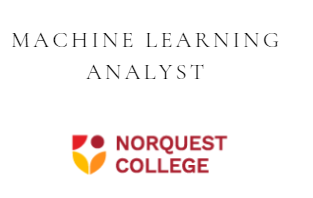

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

Before performing any data analysis and exploratory data analysis (EDA), we need to clean and preprocess the dataset. The dataset contains some columns with similar information and others that may not be relevant for analysis. We'll first clean the dataset and then perform EDA.

Here are the steps we'll follow:

**Data Cleaning:**

Remove duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [7]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:

# # Load the dataset (replace with your actual dataset)
# data = pd.read_csv('Proposed Data Collection.csv')

In [9]:
# Load the dataset with a specified encoding
data = pd.read_csv('/content/Proposed Data Collection - Form Responses 2 (1).csv')



In [10]:
data.head()

,Timestamp,Email address,Drop Off Location,City,Stake,Ward/Branch,Route Number/Name,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,...,Ward/Branch.4,Ward/Branch.5,Ward/Branch.6,Ward/Branch.7,Comments,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,Route Number/Name.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mill Creek YSA Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             453 non-null    object 
 1   Email address                                         111 non-null    object 
 2   Drop Off Location                                     453 non-null    object 
 3   City                                                  0 non-null      float64
 4   Stake                                                 453 non-null    object 
 5   Ward/Branch                                           0 non-null      float64
 6   Route Number/Name                                     0 non-null      float64
 7   # of Adult Volunteers in this route                   453 non-null    object 
 8   # of Youth Volunteers in this route                   451 no

In [12]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
data = data.drop(columns=['City','Email address','Email Address', 'Ward/Branch.1', 'Ward/Branch.2', 'Ward/Branch.3', 'Ward/Branch.4', 'Ward/Branch.5', 'Ward/Branch.6','Ward/Branch.7', 'Comments','Route Number/Name'])


In [13]:
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,Route Number/Name.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Display basic information about the dataset again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             453 non-null    object 
 1   Drop Off Location                                     453 non-null    object 
 2   Stake                                                 453 non-null    object 
 3   Ward/Branch                                           0 non-null      float64
 4   # of Adult Volunteers in this route                   453 non-null    object 
 5   # of Youth Volunteers in this route                   451 non-null    object 
 6   # of Donation Bags Collected/Route                    453 non-null    object 
 7   Time to Complete (in minutes) pick up of bags /route  453 non-null    object 
 8   Did you complete more than 1 route?                   453 no

In [15]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])

# Calculate the time spent and create a new column "Time Spent"
data['Time Spent'] = (data['The time you ended at'] - data['The time you started at:']).dt.total_seconds() / 60

# Print the updated DataFrame
print(data[['The time you started at:', 'The time you ended at', 'Time Spent']])


    The time you started at: The time you ended at  Time Spent
0                        NaT                   NaT         NaN
1                        NaT                   NaT         NaN
2                        NaT                   NaT         NaN
3                        NaT                   NaT         NaN
4                        NaT                   NaT         NaN
..                       ...                   ...         ...
456      2024-08-16 11:00:00   2024-08-16 11:45:00        45.0
457      2024-08-16 10:30:00   2024-08-16 11:15:00        45.0
458      2024-08-16 10:30:00   2024-08-16 11:15:00        45.0
459      2024-08-16 18:00:00   2024-08-16 20:00:00       120.0
460      2024-08-16 10:30:00   2024-08-16 13:00:00       150.0

[461 rows x 3 columns]


<ipython-input-15-8a2ebe7d7118>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])
<ipython-input-15-8a2ebe7d7118>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])


In [16]:
data.head()

,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,The time you started at:,The time you ended at,Route Number/Name.1,Time Spent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [17]:
# Drop the "The time you started at" and "The time you ended at" columns
data = data.drop(columns=['The time you started at:', 'The time you ended at'])


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Timestamp                                             453 non-null    object 
 1   Drop Off Location                                     453 non-null    object 
 2   Stake                                                 453 non-null    object 
 3   Ward/Branch                                           0 non-null      float64
 4   # of Adult Volunteers in this route                   453 non-null    object 
 5   # of Youth Volunteers in this route                   451 non-null    object 
 6   # of Donation Bags Collected/Route                    453 non-null    object 
 7   Time to Complete (in minutes) pick up of bags /route  453 non-null    object 
 8   Did you complete more than 1 route?                   453 no

In [19]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"
data['Number of routes completed'] = pd.to_numeric(data['Number of routes completed'], errors='coerce')
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')


In [20]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'
avg_routes_completed = data['Number of routes completed'].mean()
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()
# Fill missing values with the averages
data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data.head()


,Timestamp,Drop Off Location,Stake,Ward/Branch,# of Adult Volunteers in this route,# of Youth Volunteers in this route,# of Donation Bags Collected/Route,Time to Complete (in minutes) pick up of bags /route,Did you complete more than 1 route?,Number of routes completed,# of Doors in Route,Route Number/Name.1,Time Spent
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403974,194.894484,NaN,-30.269048
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403974,194.894484,NaN,-30.269048
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403974,194.894484,NaN,-30.269048
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403974,194.894484,NaN,-30.269048
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.403974,194.894484,NaN,-30.269048


In [21]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Timestamp                                                 8
Drop Off Location                                         8
Stake                                                     8
Ward/Branch                                             461
# of Adult Volunteers in this route                       8
# of Youth Volunteers in this route                      10
# of Donation Bags Collected/Route                        8
Time to Complete (in minutes) pick up of bags /route      8
Did you complete more than 1 route?                       8
Number of routes completed                                0
# of Doors in Route                                       0
Route Number/Name.1                                     461
Time Spent                                                0
dtype: int64


In [22]:

# Rename columns for clarity
data = data.rename(columns={
    'Timestamp': 'Date',
    'Drop Off Location': 'Location',
    'City': 'City',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers in this route': '# of Adult Volunteers',
    '# of Youth Volunteers in this route': '# of Youth Volunteers',
    '# of Donation Bags Collected/Route': 'Donation Bags Collected',
    'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Number of routes completed': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route'
})


In [23]:
# Print the dtypes for each column
data.dtypes

,0
Date,object
Location,object
Stake,object
Ward/Branch,float64
# of Adult Volunteers,object
# of Youth Volunteers,object
Donation Bags Collected,object
Time to Complete (min),object
Completed More Than One Route,object
Routes Completed,float64


In [25]:
# Convert columns to integer data types
int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Routes Completed','Doors in Route']
data[int_columns] = data[int_columns].astype(int)

ValueError: cannot convert float NaN to integer

If errors like this pop up:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
.....

ValueError: invalid literal for int() with base 10: 'Two'
You might need to do a search of the erroneous word in the dataset and replace with values.

Reupload the dataset and rerun.

In [28]:
# Convert columns to the right data types
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' to datetime
data['Routes Completed'] = data['Routes Completed'].astype(int)  # Convert 'Routes Completed' to float
data['Doors in Route'] = data['Doors in Route'].astype(int)  # Convert 'Doors in Route' to float
data['Time Spent'] = data['Time Spent'].astype(float)  # Convert 'Time Spent' to float




In [29]:
data['Completed More Than One Route'] = data['Completed More Than One Route'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(str)
print(data.dtypes)



Date                             datetime64[ns]
Location                                 object
Stake                                    object
Ward/Branch                             float64
# of Adult Volunteers                    object
# of Youth Volunteers                    object
Donation Bags Collected                  object
Time to Complete (min)                   object
Completed More Than One Route             int64
Routes Completed                          int64
Doors in Route                            int64
Route Number/Name.1                     float64
Time Spent                              float64
dtype: object


In [30]:
data.head()

,Date,Location,Stake,Ward/Branch,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Time to Complete (min),Completed More Than One Route,Routes Completed,Doors in Route,Route Number/Name.1,Time Spent
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,194,NaN,-30.269048
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,194,NaN,-30.269048
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,194,NaN,-30.269048
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,194,NaN,-30.269048
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2,194,NaN,-30.269048


# Exploratory Data Analysis

In [31]:
data.describe()

,Date,Ward/Branch,Completed More Than One Route,Routes Completed,Doors in Route,Route Number/Name.1,Time Spent
count,453,0.0,461.000000,461.000000,461.000000,0.0,461.000000
mean,2023-09-23 16:44:20.640176640,NaN,0.334056,2.130152,194.809111,NaN,-30.269048
min,2023-09-23 10:36:10,NaN,0.000000,1.000000,1.000000,NaN,-690.000000
25%,2023-09-23 11:38:32,NaN,0.000000,2.000000,118.000000,NaN,21.000000
50%,2023-09-23 12:04:20,NaN,0.000000,2.000000,174.000000,NaN,45.000000
75%,2023-09-23 12:41:37,NaN,1.000000,2.000000,212.000000,NaN,60.000000
max,2023-10-15 11:15:43,NaN,1.000000,8.000000,2500.000000,NaN,754.000000
std,NaN,NaN,0.472172,0.632784,171.995546,NaN,238.817697


Text(0.5, 1.0, 'Distribution of Adult Volunteers')

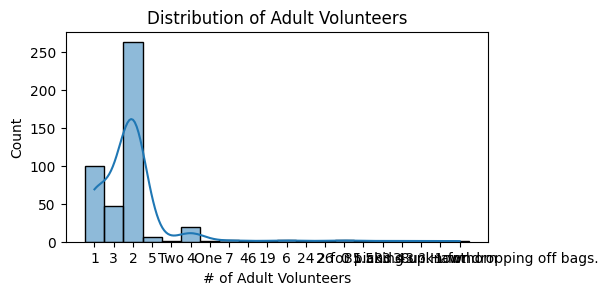

In [32]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

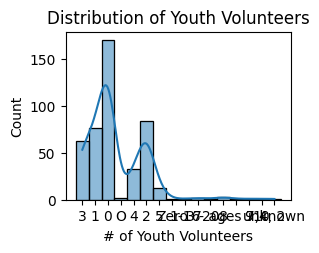

In [33]:
plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

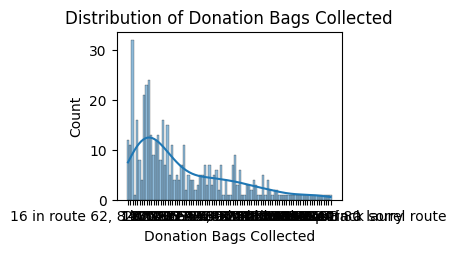

In [34]:
plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

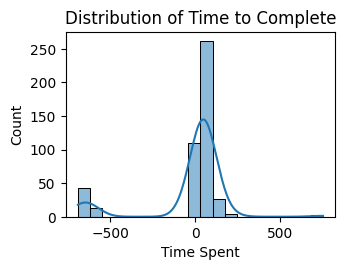

In [35]:
plt.subplot(2, 2, 4)
sns.histplot(data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()


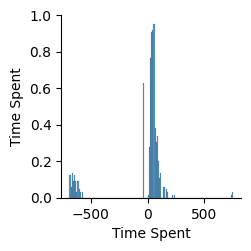

In [36]:
# Visualize relationships between numerical features
sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time Spent']])
plt.show()

In [37]:
# # Visualize relationships between categorical features (if any)
# # Replace 'categorical_column' with your actual categorical column name
# if 'categorical_column' in data.columns:
#     sns.countplot(x='categorical_column', data=data)
#     plt.title('Countplot of Categorical Column')
#     plt.show()


In [39]:
# Correlation heatmap for numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'Londonderry Chapel'

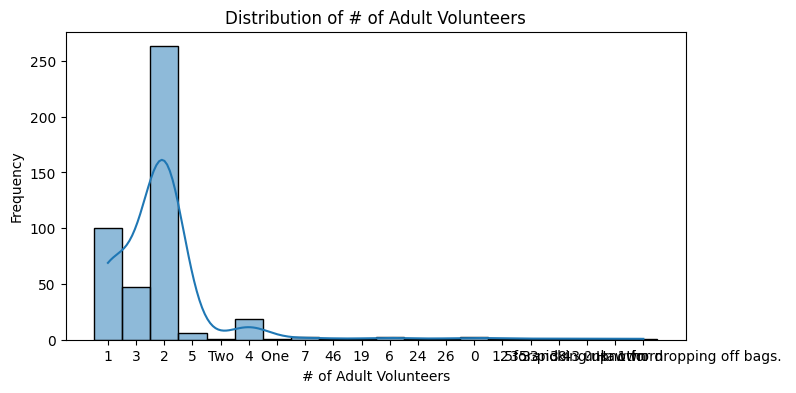

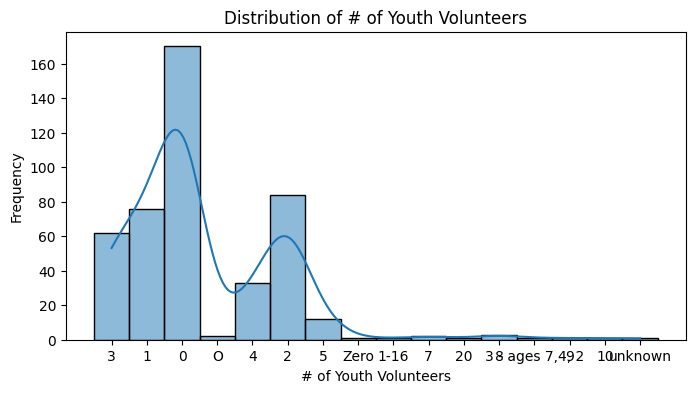

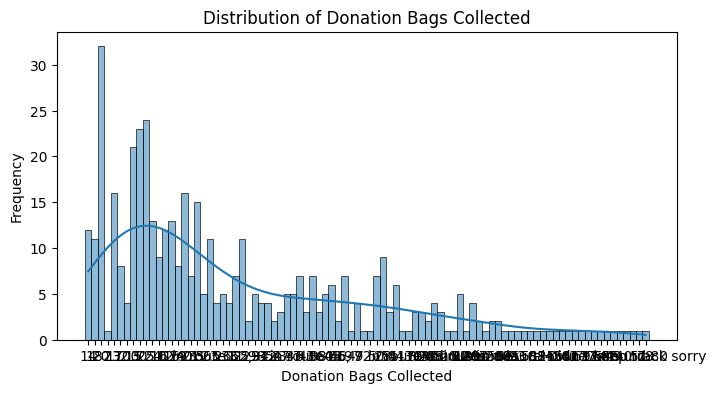

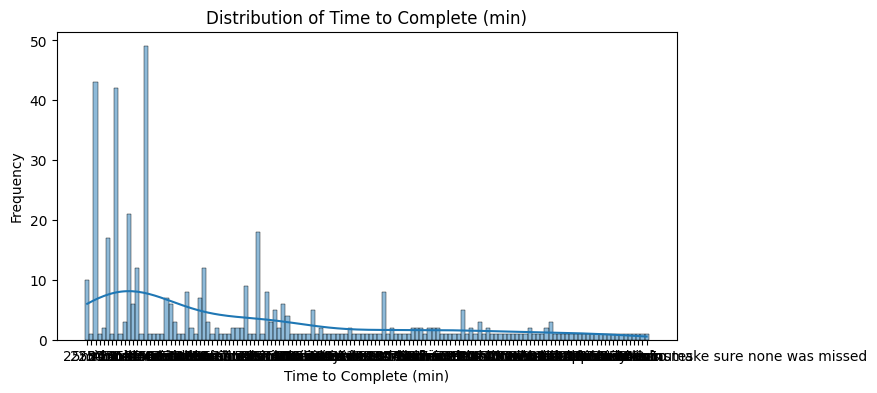

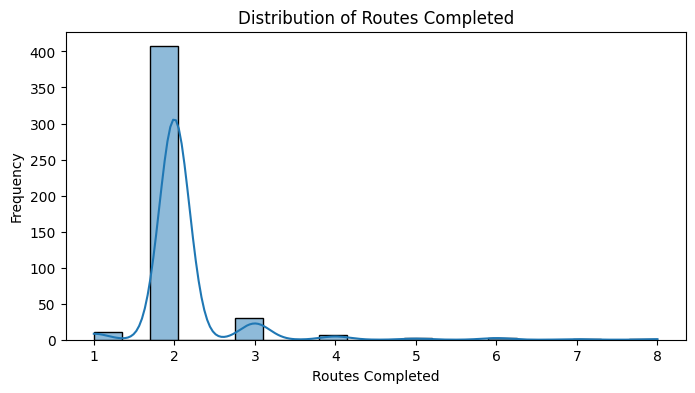

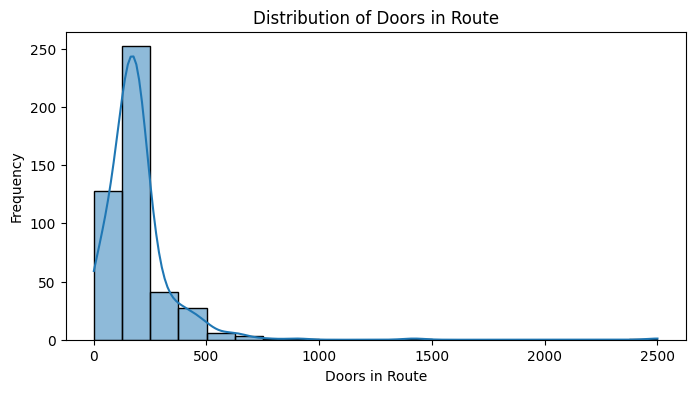

In [40]:

# Distribution of numerical variables
numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time to Complete (min)', 'Routes Completed', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

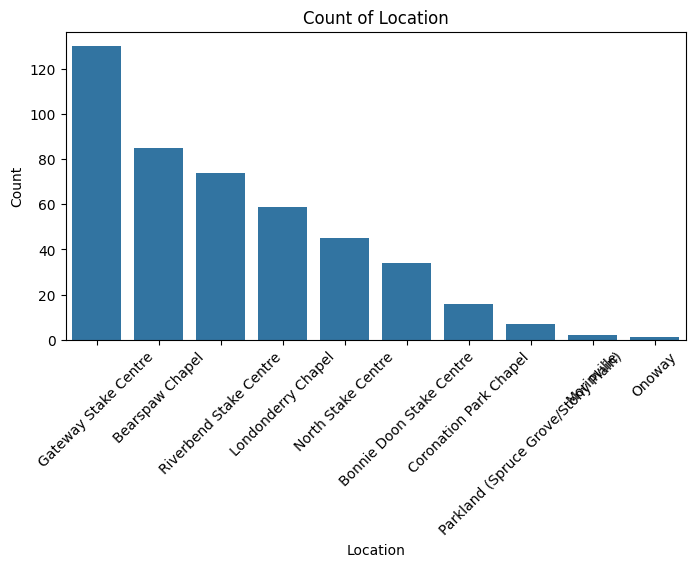

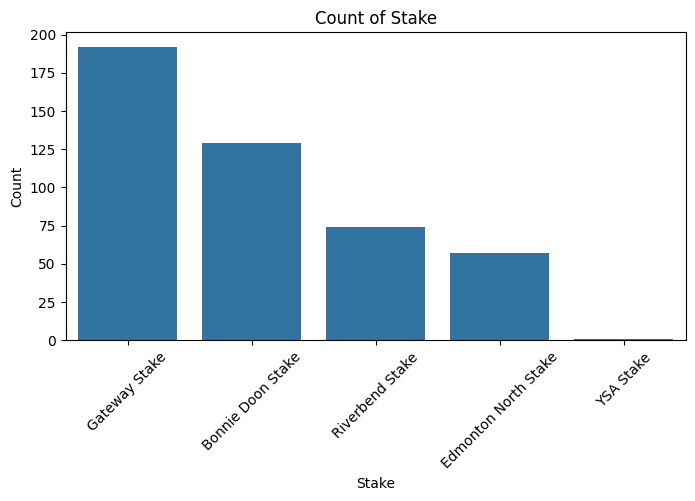

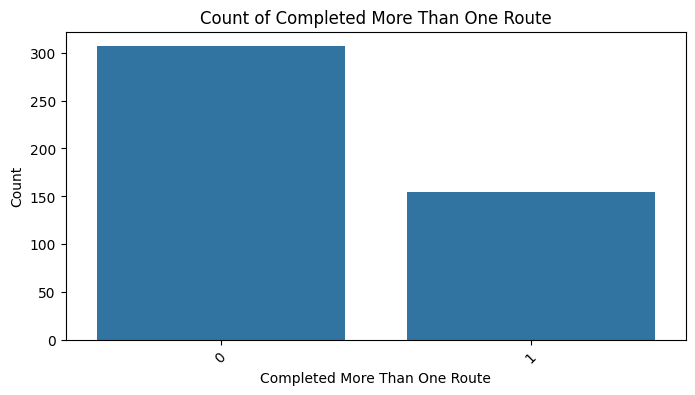

In [41]:
# Count of categorical variables
categorical_columns = ['Location','Stake','Completed More Than One Route']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-42-0dc7f9c668a9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)


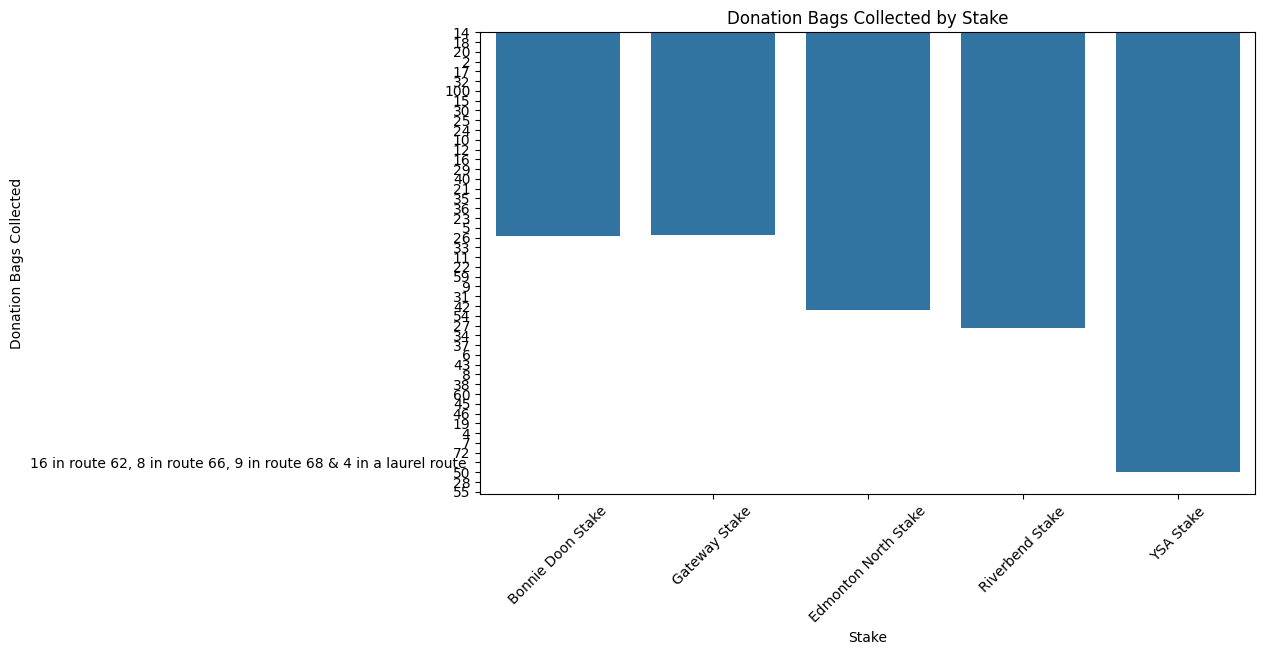

In [42]:

# Visualizations (customize as needed)
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


#AutoEDA

In [43]:
!pip install pandas-profiling[notebook,html]

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=10584b299b2871a14765675c34706b3b2580a14d4c5dcd9ec19d185e8684c388
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [51]:
!pip install pydantic-settings

In [54]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
from pydantic_settings import BaseSettings # Import BaseSettings from pydantic-settings


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.8/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.8/u/import-error

In [ ]:
pandas_profiling.__version__

# Generate Report

In [ ]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

# Interview Readiness

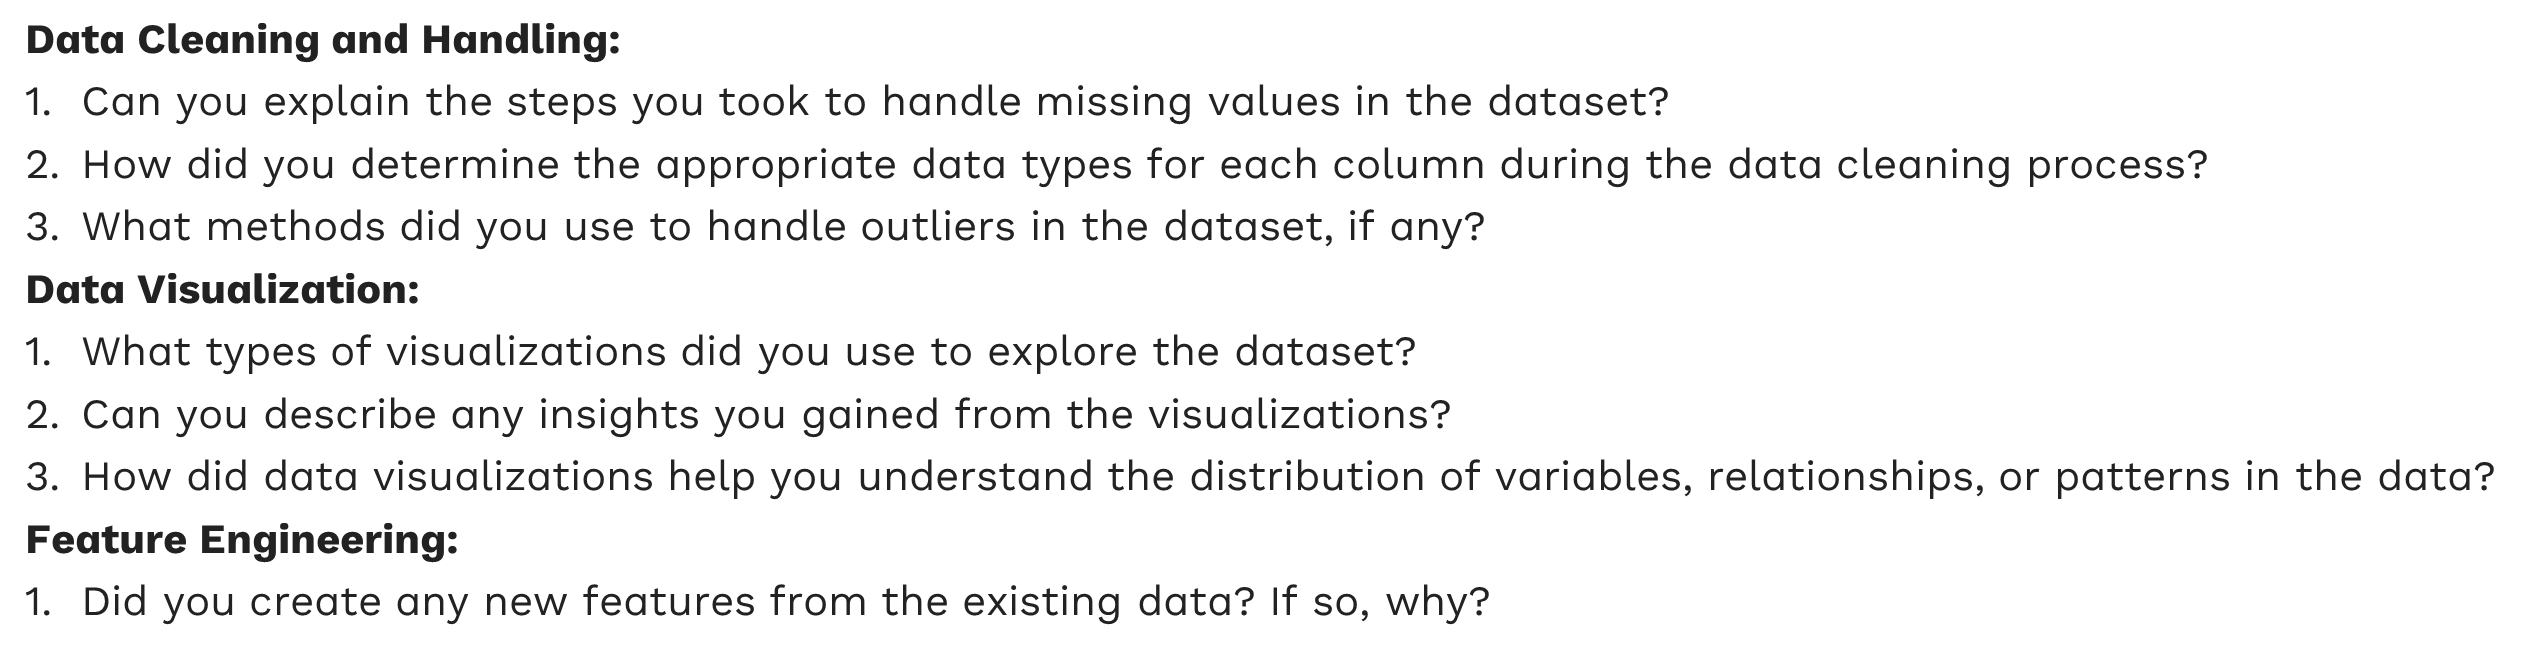

# Other Visualizations


1. **Bar Chart for Bags Collected:**
   - Display the total number of bags collected for each region, ward, or route. This helps in comparing collection efficiency across different areas.

2. **Pie Chart for Bags Collected by Region:**
   - Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

3. **Line Chart for Time Spent:**
   - Plot the average time spent on each route over time. This chart can help identify trends in the time taken for collections.

4. **Stacked Bar Chart for Bags Collected by Ward:**
   - Display the number of bags collected in each ward, with different colors representing different routes within the ward. This helps in understanding route-wise collections within a ward.

5. **Bubble Chart for Time Spent vs. Bags Collected:**
   - Represent each route as a bubble where the X-axis is the time spent, the Y-axis is the bags collected, and the size of the bubble represents the number of collections. This chart can reveal efficiency outliers.

6. **Heatmap for Bags Collected and Time Spent:**
   - Create a heatmap where the X-axis represents time spent, the Y-axis represents routes, and the color intensity represents the number of bags collected. This visualization helps identify patterns based on both time spent and bags collected.

7. **Bar Chart for Average Time Spent by Ward:**
   - Display the average time spent on routes within each ward. This can help identify wards with particularly time-consuming routes.

8. **Box Plot for Time Spent:**
   - Use a box plot to show the distribution of time spent on different routes. This visualization provides insights into the variability in collection times.

9. **Donut Chart for Bags Collected by Route:**
   - Display the proportion of bags collected by different routes within a ward. The inner circle represents the total bags collected in the ward, and the outer ring shows the distribution by routes.

10. **Choropleth Map for Bags Collected by Region:**
    - Use a map visualization where regions are shaded based on the total bags collected. Darker shades represent higher collections, providing a geographic perspective